Build CNN for Classification of flowers

Import required Packages

In [ ]:
import keras


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 rotation_range=180,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

test_dataGen=ImageDataGenerator(rescale=1./255)

In [ ]:
#install Kaggle
!pip install -q kaggle

In [ ]:
#create a kaggle folder
!mkdir ~/.kaggle

In [ ]:
#copy the kaggle.json to folder created 
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
#permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


# Download the Data set

In [ ]:
x_train = train_datagen.flow_from_directory(r'/content/drive/MyDrive/IBM/train_set',
target_size = (128,128),
batch_size = 32,
class_mode = 'binary')

Found 2313 images belonging to 5 classes.


In [ ]:
x_test = test_dataGen.flow_from_directory(r'/content/drive/MyDrive/IBM/test_set',
target_size = (128,128),
batch_size = 32,
class_mode = 'binary')

Found 2068 images belonging to 5 classes.


# Add Layers (Convolution,MaxPooling,Flatten,Dense-(Hidden Layers),Output)

In [ ]:
#To define Linear intialisation import

from keras.models import Sequential
 #To add Layers import Dense

from keras.layers import Dense 

#To create Convolution kernel import Convolution20 from keras.layers import Convolution20

from keras.layers import Convolution2D

from keras.layers import MaxPooling2D 

#import Flatten Layer

from keras.layers import Flatten 

import warnings
warnings.filterwarnings('ignore')


In [ ]:
 #initialize our model
model = Sequential()

In [ ]:
#Adding Convolutional Layer 
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))


In [ ]:
#Adding Pooling LayerMax Pooling
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
#Adding Flatten Layer
model.add(Flatten())

Adding Hidden layers

In [ ]:
model.add(Dense(2,activation='relu'))

In [ ]:
model.add(Dense(150, bias_initializer='uniform', activation='relu'))

Adding output layer

In [ ]:
model.add(Dense (1, bias_initializer='uniform', activation='sigmoid'))

Compile the Model

In [ ]:

model.compile(loss = 'binary_crossentropy',

              optimizer = "adam",

              metrics = ["accuracy"])

# Fit The Model

In [ ]:
model.fit_generator(x_train,steps_per_epoch=14,

                    epochs=10,validation_data=x_test,

                    validation_steps=4)

Epoch 1/10
14/14 [==============================] - 218s 16s/step - loss: 0.6122 - accuracy: 0.2723 - val_loss: 0.5023 - val_accuracy: 0.2500
Epoch 2/10
14/14 [==============================] - 165s 12s/step - loss: 0.4433 - accuracy: 0.2500 - val_loss: 0.3061 - val_accuracy: 0.2422
Epoch 3/10
14/14 [==============================] - 146s 11s/step - loss: 0.2509 - accuracy: 0.2701 - val_loss: 0.0892 - val_accuracy: 0.2578
Epoch 4/10
14/14 [==============================] - 110s 8s/step - loss: 0.0422 - accuracy: 0.2433 - val_loss: -0.0103 - val_accuracy: 0.2109
Epoch 5/10
14/14 [==============================] - 97s 7s/step - loss: -0.1317 - accuracy: 0.2232 - val_loss: -0.2375 - val_accuracy: 0.2578
Epoch 6/10
14/14 [==============================] - 84s 6s/step - loss: -0.3785 - accuracy: 0.2188 - val_loss: -0.4834 - val_accuracy: 0.2344
Epoch 7/10
14/14 [==============================] - 72s 5s/step - loss: -0.7681 - accuracy: 0.2254 - val_loss: -1.0335 - val_accuracy: 0.2734
Epoch 

Save The Model
  Test the Model

In [ ]:
model.save("flowers.h5")

In [ ]:
ls


drive/  flowers.h5  sample_data/


In [ ]:
from keras.models import load_model

#import image class from keros

from keras.preprocessing import image

#import numpy

import numpy as np

#import cv2

import cv2

In [ ]:
#Load the saved model

model = load_model("flowers.h5")

#Image Augmentation

In [ ]:
#give any random image path

img = image.load_img(r'/content/drive/MyDrive/IBM/test_set/rose/10503217854_e66a804309.jpg')

x = image.img_to_array(img)

#expand the image shape

x = np.expand_dims(x,axis= 0)

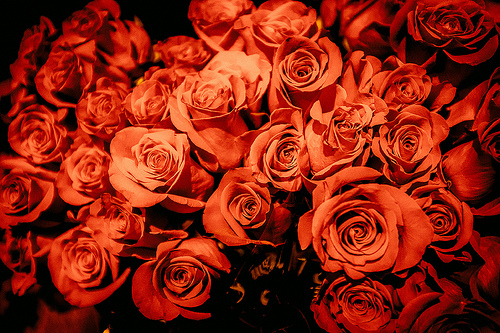

In [ ]:
img

In [ ]:
pip install imgaug


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install ipyplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 14.1 MB/s 


Create Model

In [ ]:
import ipyplot
import imageio
import imgaug as ia
import imgaug.augmenters as iaa



In [ ]:
input=imageio.imread("/content/drive/MyDrive/IBM/test_set/rose/12338444334_72fcc2fc58_m.jpg")

In [ ]:
hflip = iaa.Fliplr(p=1.0) 
input_hf = hflip.augment_image(input)


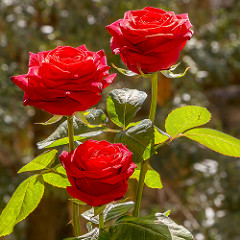
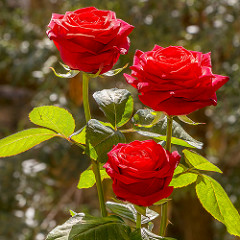
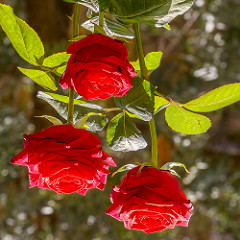


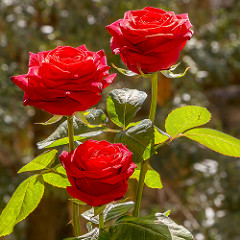
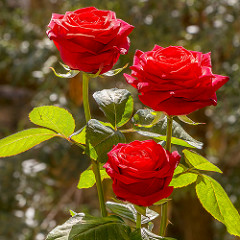
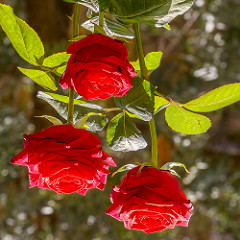

In [ ]:
vflip=iaa.Flipud (p=1.0)
input_vf=vflip.augment_image(input)
images_list=[input, input_hf, input_vf] 
labels =['Original', 'Horizontally flipped', 'Vertically flipped']
ipyplot.plot_images (images_list,labels=labels, img_width=180)



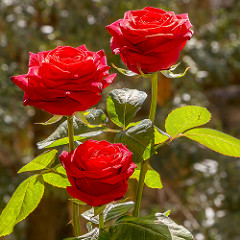
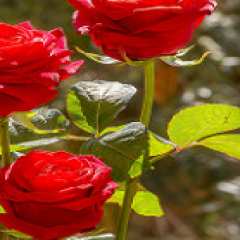


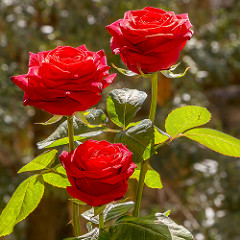
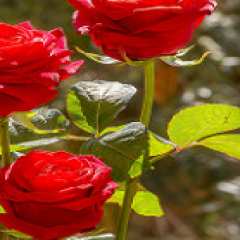

In [ ]:
crop1=iaa.Crop (percent=(0, 0.3))
input_crop1 = crop1.augment_image(input) 
images_list=[input, input_crop1] 
labels = ['Original', 'Cropped Image'] 
ipyplot.plot_images (images_list, labels=labels, img_width=180)


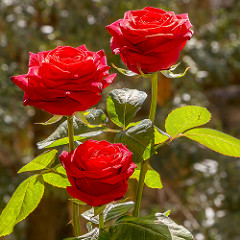
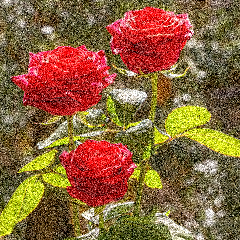


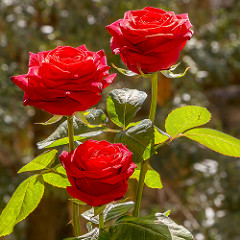
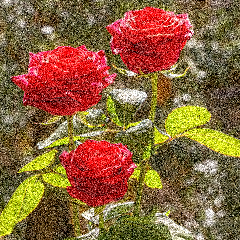

In [ ]:
noise=iaa. AdditiveGaussianNoise (18,48)
input_noise=noise.augment_image(input)
images_list=[input, input_noise]
labels= ["Original", "Gaussian Noise Image"]
ipyplot.plot_images(images_list, labels=labels, img_width=188)


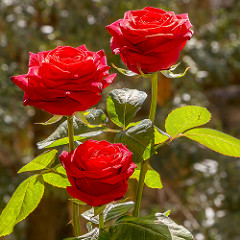
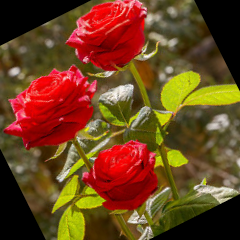


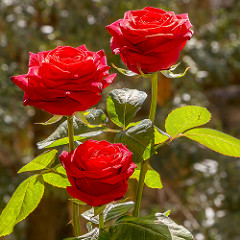
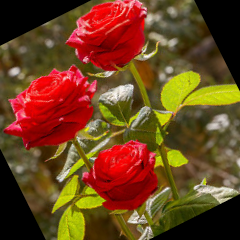

In [ ]:
rot1 = iaa.Affine(rotate=(-30,30))

input_rot1 = rot1.augment_image(input)
images_list=[input, input_rot1]
labels= ['Original', 'Rotated Image'] 
ipyplot.plot_images(images_list,labels=labels, img_width=180)